In [1]:
#!usr/bin/python

import rioxarray
import matplotlib.pyplot as plt
import xarray

In [2]:
#Tutorial from:
#https://opensourceoptions.com/a-better-way-to-read-netcdf-with-python-rioxarray/
#Data from:
#https://www.reacchpna.org/thredds/catalog/MET/pr/catalog.html?dataset=REACCHDatasetScan_pr/pr_2020.nc

fn= '/Users/mariamac/Downloads/pr_2020.nc'
xr = rioxarray.open_rasterio(fn)

In [3]:
xr.attrs

{'add_offset': 0.0,
 'coordinates': 'lon lat',
 'coordinate_system': 'WGS84,EPSG:4326',
 'description': 'Daily Accumulated Precipitation',
 'dimensions': 'lon lat time',
 'long_name': 'pr',
 'missing_value': 32767,
 'scale_factor': 0.1,
 'standard_name': 'pr',
 'units': ('mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  'mm',
  

In [4]:
xr.attrs['units'] = 'mm'

In [5]:
xr.attrs

{'add_offset': 0.0,
 'coordinates': 'lon lat',
 'coordinate_system': 'WGS84,EPSG:4326',
 'description': 'Daily Accumulated Precipitation',
 'dimensions': 'lon lat time',
 'long_name': 'pr',
 'missing_value': 32767,
 'scale_factor': 0.1,
 'standard_name': 'pr',
 'units': 'mm',
 '_FillValue': 32767.0,
 '_Unsigned': 'true'}

In [6]:
xr.dims

('day', 'y', 'x')

In [7]:
xr.coords

Coordinates:
  * day      (day) object 2020-01-01 00:00:00 ... 2020-12-31 00:00:00
  * x        (x) float64 -124.8 -124.7 -124.7 -124.6 ... -67.14 -67.1 -67.06
  * y        (y) float64 49.4 49.36 49.32 49.28 ... 25.19 25.15 25.11 25.07
    crs      int64 0

**Note:** "The data above gives important information about the structure of the dataset. Note the scale_factor value of 0.1. This means you need to multiply the data values by 0.1 to get them in the correct units. For this tutorial I’m not going to do the multiplication, just be aware of the value for when you do actual analysis. Not all datasets will have a scale factor."

In [8]:
#prints out an array for rows 100-105 and columns 100-105 in the dataset on the 113th day of the year.
xr[112, 100:105, 100:105]

<xarray.DataArray 'precipitation_amount' (y: 5, x: 5)>
array([[42, 38, 42, 41, 38],
       [43, 45, 41, 36, 41],
       [44, 46, 48, 43, 43],
       [52, 55, 55, 49, 50],
       [53, 55, 55, 46, 51]], dtype=uint16)
Coordinates:
    day      object 2020-04-22 00:00:00
  * x        (x) float64 -120.6 -120.6 -120.5 -120.5 -120.4
  * y        (y) float64 45.23 45.19 45.15 45.11 45.07
    crs      int64 0
Attributes:
    add_offset:         0.0
    coordinates:        lon lat
    coordinate_system:  WGS84,EPSG:4326
    description:        Daily Accumulated Precipitation
    dimensions:         lon lat time
    long_name:          pr
    missing_value:      32767
    scale_factor:       0.1
    standard_name:      pr
    units:              mm
    _FillValue:         32767.0
    _Unsigned:          true

In [9]:
xr[:, 100, 100]

<xarray.DataArray 'precipitation_amount' (day: 366)>
array([ 0,  0,  0, ..., 16, 34,  0], dtype=uint16)
Coordinates:
  * day      (day) object 2020-01-01 00:00:00 ... 2020-12-31 00:00:00
    x        float64 -120.6
    y        float64 45.23
    crs      int64 0
Attributes:
    add_offset:         0.0
    coordinates:        lon lat
    coordinate_system:  WGS84,EPSG:4326
    description:        Daily Accumulated Precipitation
    dimensions:         lon lat time
    long_name:          pr
    missing_value:      32767
    scale_factor:       0.1
    standard_name:      pr
    units:              mm
    _FillValue:         32767.0
    _Unsigned:          true

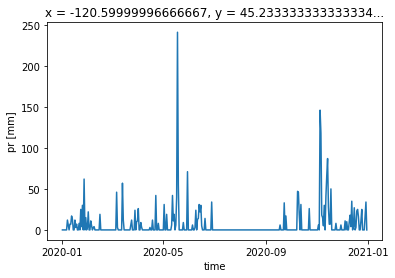

In [10]:
xr[:, 100, 100].plot()

CPU times: user 45.8 s, sys: 6.72 s, total: 52.5 s
Wall time: 54.6 s


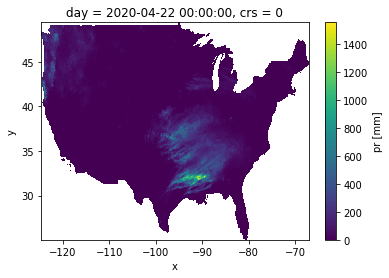

In [11]:
%%time
#map of precipitation for the entire United States on the 113th day of 2020
xr_masked = xr.where(xr != xr.attrs['missing_value'])
xr_masked[112, :, :].plot()

In [12]:
#the average precipitation for the entire United States during 2020
xr_masked.mean()

<xarray.DataArray 'precipitation_amount' ()>
array(22.14306263)
Coordinates:
    crs      int64 0

In [13]:
#To get the actual value we’ll need to multiple by the scale factor.

xr_masked.mean() * xr.attrs['scale_factor']

<xarray.DataArray 'precipitation_amount' ()>
array(2.21430626)
Coordinates:
    crs      int64 0

CPU times: user 1.3 s, sys: 2.71 s, total: 4.01 s
Wall time: 6.21 s


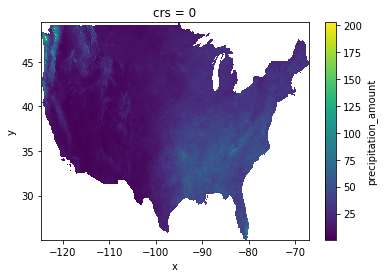

In [14]:
%%time
#map of average precipitation across the US
xr_masked.mean(dim='day').plot()

CPU times: user 950 ms, sys: 2.13 s, total: 3.08 s
Wall time: 4.92 s


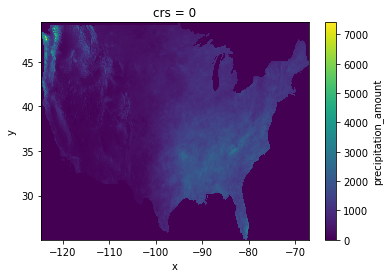

In [15]:
%%time
#the total annual precipitation

(xr_masked.sum(dim='day') * xr.attrs['scale_factor']).plot()